<center><h1><b>SQL LANGUAGE</b></h1></center>

---

# 00 - INTRODUCTION

### DATABASES

Databases are collection of tables. Tables are collection of data entries. Databases are essential for storing and managing data efficiently. They can be broadly classified into relational and non-relational databases:
* **Relational Databases** (RDB) store data in structured tables with predefined schemas. They use relationships between tables to maintain data integrity and are well-suited for structured data.
* **Non-Relational Databases** (NoSQL) handle unstructured or semi-structured data. They offer more flexibility, supporting various data models like key-value stores, document stores, column-family stores, and graph databases.


Nei database distinguiamo due aspetti: **Modello** (o schema): la descrizione dei dati e le relazioni tra le varie
parti del dataset; **Istanza** (o stato): il contenuto vero e proprio nel database, cioè i dati.

A table is a collection of related data entries, and it consists of columns and rows. A column holds specific information about every record in the table. A record (or row) is each individual entry that exists in a table.

### RELATIONAL DATABASES

Relational databases follow the Relational Model, where data is organized into tables (relations) with rows (records) and columns (attributes). Relationships between tables are managed through primary keys and foreign keys to ensure data consistency. Relational databases ensure ACID (Atomicity, Consistency, Isolation, Durability) properties, making them ideal for applications requiring strong data integrity, such as financial systems.

Distinguiamo chiaramente tre elementi:
* I **record**, corrispondenti alle singole righe della tabella, dette anche tuple
* Gli **attributi**, corrispondenti alle singole colonne
* La **primary key** (chiave primaria), corrispondente a un attributo specifico o ad una loro combinazione; essa deve rispondere a due caratteristiche fondamentali: deve essere unica (nel senso che tuple differenti non possono avere key uguali) e deve essere minimale (nel senso che è richiesto il numero minimo di attributi per definire tale key)

Per legare le varie tabelle viene fatto uso delle cosiddette **foreign key** (chiavi esterne), ovvero attributi o combinazioni di attributi in delle tabelle che fungono però da primary key in un’altra tabella.

### SQL

Structured Query Language (SQL), also spelled 'sequel', is used to interact with relational databases. It allows:
* Data Definition Language (DDL): Creating and modifying table structures (CREATE, ALTER, DROP...).
* Data Manipulation Language (DML): Inserting, updating, deleting, and retrieving data (INSERT, UPDATE, DELETE, SELECT...).
* Data Control Language (DCL): Managing access and permissions (GRANT, REVOKE...).
* Transaction Management: Ensuring data integrity with commands like COMMIT and ROLLBACK.

IMPORTANT things: 
* Ogni istruzione in SQL deve terminare con `;`
* there's no indentation rules
* the symbol `*` stands for 'all'
* use `--` for commenting in a single line, and `/*  ...  */` for multiple line comments
* the commands are not case sensitive, but it's a convention to write in capital letters

There are many variants of SQL, based on the differents DBMS (database managment systems). We will see MySQL, which is free, open-source and cross-platform. It is developed, distributed, and supported by Oracle Corporation.

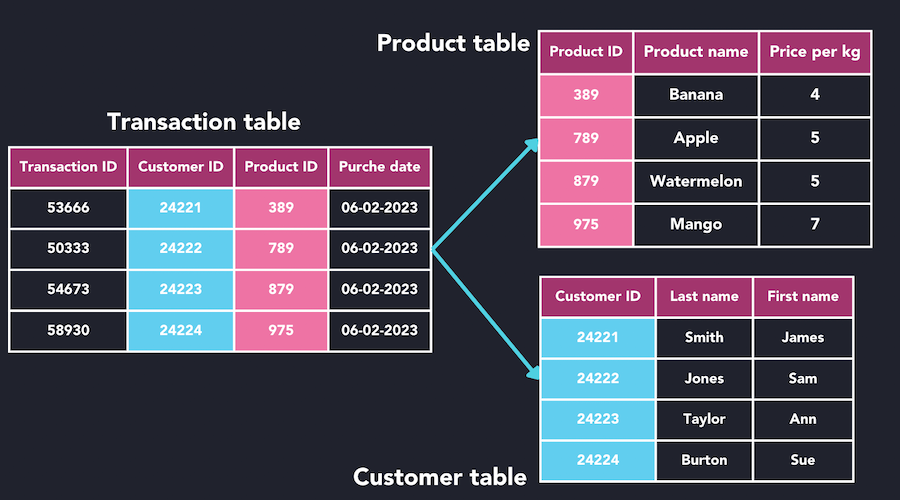

In [3]:
# EXAMPLE OF RELATIONAL DATABASE WITH 3 TABLES:
from IPython.display import Image, display
display(Image("./images/relational_database.png"))

---

# 01 - TABLES

Vediamo ora un elenco dei principali semplici comandi SQL per gestire database e tables.

### DATABASE:

A database is a structured collection of data that allows efficient storage, retrieval, and management. It can contain multiple tables, views, indexes, and other objects used to organize and manipulate data. Main commands:

* `SHOW DATABASES`: per visualizzare i database presenti in memoria
* `CREATE DATABASE name`: per creare un database
    * `CREATE DATABASE IF NOT EXISTS name`: per evitare problemi è sempre meglio specificare che la creazione è possibile solo
se un database con quel nome non esiste già
* `USE name`: per usare un database

### TABLES:
A table is a specific structure within a database that organizes data into rows and columns. Each row represents a single record, while each column represents a specific attribute of that record. Main commands:

* `SHOW TABLES`: usando un database possiamo farci mostrare le tabelle contenute in esso
* `CREATE TABLE name(...)`: to create a table. Inside we will insert attributes and their types.
* `DESCRIBE table_name`: to see the carateristics of a table
* `SHOW CREATE TABLE table_name`: to see all the info of the table at the moment of creation
* `DROP TABLE IF EXISTS table_name`: to eliminate a whole TABLE

The `PRIMARY KEY` has to be specified inside the definition, near the wanted attribute. If the attributes are more than one, they have to be grouped up (see below).  
Per indicare una `FOREIGN KEY`, invece, è necessario specificare tra parentesi l’attributo della tabella attuale e usare l’istruzione `REFERENCES` con oggetto il nome dell'altra tabella (nella quale vi è la corrispondente chiave primaria) seguita, tra parentesi, dal nome della chiave primaria stessa.

```SQL
-- Simple example:
CREATE TABLE Authorizations (
BadgeID       int PRIMARY KEY,
Since         date,
Livello       int,
Sector        int
);

-- In case of multiple PRIMARY KEYS and a FOREIGN KEY:
CREATE TABLE Users (
UserID        varchar(30),
BadgeNum      int,
FirstName     varchar(255),
LastName      varchar(255),
Age           int,
OtherAttr     float,
PRIMARY KEY   (UserID,BadgeNum)
FOREIGN KEY   (BadgeNum) REFERENCES Authorizations(BadgeID)
);
```

Nota: L’eliminazione di una tabella implica non solo la cancellazione di tutti i record in essa contenuti, ma anche di tutte le eventuali connessioni ad altre tabelle tramite foreign key, rendendo potenzialmente inutilizzabile l’intero database.

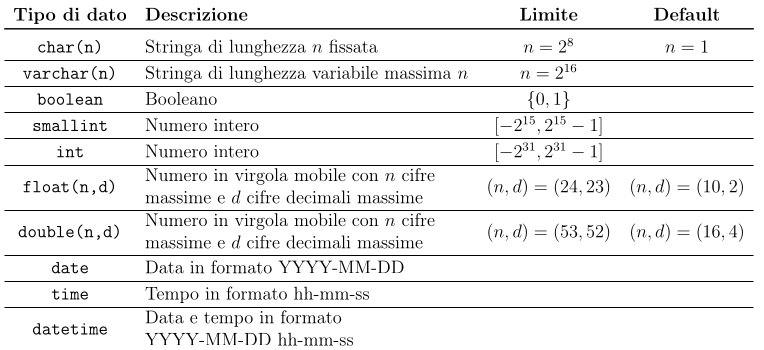

In [6]:
# DATA TYPES:
display(Image("./images/sql_table.png", width=700))

### VIEW
Un’ulteriore possibilità consiste nel definire una tabella speciale, chiamata `VIEW`, scegliendo gli attributi e imponendo delle condizioni
che devono rispettare i record. Ogni modifica apportata alla tabella principale Users verrà riflessa nella visuale OneThree, e allo stesso modo è possibile trattare OneThree come una tabella a tutti gli effetti - inserendo, modificando ed eliminando record - riflettendo i risultati su Users; è anche possibile inserire un record all’interno della visuale che non rispetti i parametri di visualizzazione (in questo caso fornendo un valore di OtherAttr al di fuori dell’intervallo [1, 3]): in tal caso il record verrà comunque inserito all’interno di Users, non figurando comunque in OneThree. Per crearla si usa `CREATE VIEW view_name AS ...`:

```SQL
CREATE VIEW OneThree AS
SELECT       UserID, BadgeNum, LastName
FROM         Users
WHERE        (OtherAttr BETWEEN 1 AND 3);
```

Per osservarne le caratteristiche è possibile scrivere:

```SQL
SHOW CREATE VIEW OneThree;
```

### CONSTRAINTS
A ogni attributo possono essere associati uno o più vincoli, indicati da parole chiave in maiuscolo che vanno riportate dopo il tipo di variabile associata all’attributo:

* `UNIQUE`: impone che ogni record associato all’attributo sia unico (utile per la PRIMARY KEY)
* `NOT NULL`: impone che in un attributo non possano esservi valori detti NULL, che sono presenti quando in un record non viene specificato suddetto attributo o quando sono immessi esplicitamente (ovvero come valore 'NULL')
* `DEFAULT`: imposta un valore di default quando non specificato dall’utente
* `CHECK (..)`: fissa una condizione sui valori dell’attributo in modo che venga restituito errore se tale condizione non venga rispettata.
    * `IN (..)`: usata dentro un CHECK, fissa una condizione di appartenenza

Esempio:
```SQL
CREATE TABLE Users (
UserID          varchar(30) PRIMARY KEY,
BadgeNum        int NOT NULL UNIQUE,
FirstName       varchar(255) NOT NULL DEFAULT ‘’,
LastName        varchar(255) NOT NULL DEFAULT ‘’,
Age             int DEFAULT 18 CHECK (Age IN (18, 19, 20)),
OtherAttr       float CHECK (OtherAttr>0)
);
```

### TABLE MODIFICATIONS
Una volta che lo schema della tabella è stato creato può venire modificato, tenendo sempre presente le varie restrizioni imposte tramite vincoli. Si tenga presente che l’alterazione della struttura di una tabella coinvolge tutti i record in essa presenti. Ogni alterazione di tabella viene eseguita tramite l’incipit `ALTER TABLE` seguito dal nome della tabella e da un comando. Options:

* `ADD COLUMN ...`: to add a column (=attribute)
* `DROP COLUMN`: to eliminate a column (=attribute)
* `ADD PRIMARY KEY attr`: to add a PRIMARY KEY after the definition of the table
* `ALTER name_att SET DEFAULT value`: per impostare un valore di default a un attributo già esistente (o per reimpostarlo nel caso ne avesse già uno)
* `MODIFY name_att data_type`: to modify an attribute (tecnically you are redefining it, so remember also the type)


```SQL
ALTER TABLE Users
ADD COLUMN Role char(1) DEFAULT ‘A’ CHECK (Role IN (‘A’,‘B’,‘C’));

ALTER TABLE Users
ALTER Role SET DEFAULT ‘B’;

ALTER TABLE Users
MODIFY Role char(1) NOT NULL;
```
You can also use `ADD CONSTRAINT ...` to add FOREIGN KEY:
```SQL
ADD CONSTRAINT FK_user      
FOREIGN KEY (User) REFERENCES Users(UserID);       
-- FK_user è il nome del vincolo fornito direttamente dall’utente, che può essere rimosso con DROP CONSTRAINT FK_user
```

---

# 02 - RECORDS

### INSERT RECORDS
Per ogni inserimento di record è necessario specificare gli attributi associati alla riga con `INSERT INTO ... VALUES ...`:

```SQL
-- single data insertion:
INSERT INTO    Users (UserID, BadgeNum, FirstName, LastName, OtherAttr)
VALUES         (‘usr:00001’, 100, ‘Rei’, ‘Ayanami’, 1.8);

-- multiple data insertion:
INSERT INTO    Users (UserID, BadgeNum, FirstName, LastName, OtherAttr)
VALUES
(‘usr:00002’, 101, ‘Asuka’, ‘Soryu Langley’, 3.5),
(‘usr:00003’, 102, ‘Shinji’, ‘Ikari’, 2.9),
(‘usr:00004’, 103, ‘Toji’, ‘Suzuhara’, 4.7),
(‘usr:00005’, 104, ‘Kaworu’, ‘Nagisa’, 3.0); 
```

### MODIFY RECORDS
* `UPDATE table_name SET attr_value WHERE ...`: il comando che permette di modificare i record in modo individuale o collettivo è UPDATE; a esso seguirà il SET e infine la condizione che stabilisce dove deve essere eseguita tale modifica attraverso il WHERE. Useful characters for WHERE are: `_` for any single char, `%` for any string. We can use them through the `LIKE` command.
* `DELETE FROM table_name WHERE ... `: to delete records from a table

```SQL
UPDATE        Users
SET           OtherAttr = 5.0
WHERE         (FirstName LIKE ‘__i%’); -- First names with at least 3 characters and the third character is 'i'

DELETE FROM   Users
WHERE         (LastName LIKE ‘%p_’);   -- Last names with at least 2 characters and the penultimate letter is a 'p'
```

### SELECT RECORDS
`SELECT ... FROM ...`: Il comando SELECT è il più potente e utilizzato nel linguaggio SQL, in quanto permette l’estrazione di determinati record secondo delle condizioni specificate dall’utente, ovvero le cosidette query. There are then many options:
* `SELECT .. FROM ... LIMIT n`: with this we limit the output at the first n rows
* `SELECT DISTINCT ... FROM ...`: returns only unique values (no duplicates)
* `SELECT .. FROM ... ORDER BY ...`: to order the records by an attribute (default=ascendent)
* `SELECT .. FROM ... WHERE`: to select only wanted rows
* `SELECT ..(operation) FROM ..`: permette la visualizzazione di attributi ai cui valori sono stati applicati operazioni matematiche. Le operazioni non andranno in questo caso a modificare i valori nella tabella, ma solo quelli visualizzati in output dall’utente.
* `SELECT .. AS .. FROM ..`: per definire degli alias (sia per gli attributi che per intere tabelle). Note: the word `AS` is not mandatory, it works also without it, only specifying the alia name, but using it is more clear

Other math options: `COUNT()`, `MAX()`, `MIN()`, `SUM()`, `AVG()`.

```SQL
SELECT * FROM Users                  -- this selects all records of the table 'Users'
LIMIT 3;                             -- with this it shows only the first 3 rows

SELECT FirstName FROM Users          -- selects only the attribute 'FirstName' of the table 'Users'
ORDER BY FirstName DESC;             -- descendant order specified

-- in this line we select both the doubles and the squares of two attributes, and we associate them two aliases
SELECT OtherAttr*2 AS OA, POWER(BadgeNum,2) AS PO FROM Users  
WHERE (OtherAttr > 1.8);                                       -- but only the rows with this condition

SELECT DISTINCT FirstName AS name    -- we select only once each different FirstName
FROM Users;
```

With `GROUP BY` we can also group up rows with same values for a specific attribute.

```SQL
-- this query counts how many unique cities ships departed from, for each country
SELECT FromCountry, COUNT(DISTINCT FromCity) AS TotalCities
FROM Ships
GROUP BY FromCountry;                -- groups all rows by country of origin 
```

Per filtrare i risultati dell’attributo raggruppato attraverso funzioni quali COUNT, SUM e AVG è possibile utilizzare `HAVING`:

```SQL
SELECT FromCountry, COUNT(DISTINCT FromCity) AS TotalCities
FROM Ships
GROUP BY FromCountry
HAVING TotalCities>1                 -- filters out countries that have less than two cities
ORDER BY TotalCities DESC;
```

### JOINING TABLES
With JOIN we have the ability to view tables combined through values in certain attributes (typically primary keys) that are equal in both tables. There are many kinds of join:
* `INNER JOIN`: only the records where the values of the common attribute match in both tables are shown. The inner join is commutative. Note: if you only write 'JOIN', tipycally is set on INNER JOIN by default
* `LEFT JOIN`: all records from the first table are selected, and for those that do not have a match in the second table, the related attributes are filled with NULL. This happens because the second table is being joined to the first. Reversing the order of the tables will produce a different result.
* `RIGHT JOIN`: the opposite behavior — in this case, the first table is joined to the second.
* *FULL JOIN*: also called OUTER JOIN. SQL does not offer an explicit function that performs this, but it can be done by combining a left join with a right join using UNION.

```SQL
-- The generic SYNTAX is:
SELECT column_names
FROM table1 AS t1
JOIN table2 AS t2
ON t1.column = t2.column;  -- 'ON' is used to specify the condition for how the tables should be joined
```

Notiamo una nuova sintassi mai vista prima: gli attributi, infatti, vengono scritti nella forma `NomeTabella.NomeAttributo`; questo è utile nel caso in cui due tabelle condividano lo stesso nome per un attributo. Vediamo ora degli esempi:


```SQL
-- In this example, s and o are aliases for the Ships and Orders tables, used to keep the query more concise:

-- INNER JOIN
SELECT s.FromCountry, o.Name, s.Rate
FROM Ships AS s
INNER JOIN Orders AS o ON s.Code = o.Code;

-- LEFT JOIN
SELECT s.FromCountry, o.Name, s.Rate
FROM Ships AS s
LEFT JOIN Orders AS o ON s.Code = o.Code;

-- FULL JOIN (via UNION)
SELECT s.FromCountry, o.Name, s.Rate
FROM Ships AS s
LEFT JOIN Orders AS o ON s.Code = o.Code
UNION
SELECT s.FromCountry, o.Name, s.Rate
FROM Ships AS s
RIGHT JOIN Orders AS o ON s.Code = o.Code;
```

Tip: always prefer a join over nested/implicit queries

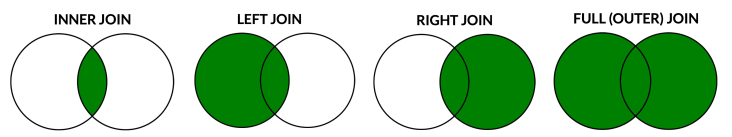

In [4]:
display(Image("./images/join.png", width=700))

### DATA CONTROL
La Data Control Language si occupa dell’accesso ai database, dei permessi concessi agli utenti e della sicurezza dei dati. La base di partenza è creare un nome utente associato a una password:

```SQL
CREATE USER ‘new_user’@‘localhost’
IDENTIFIED BY ‘new_password’;
```

Tramite questo comando verrà creato un nuovo utente con nome ‘new_user’, che può connettersi unicamente dalla macchina locale (‘localhost’) e a cui è associata una password ‘new_password’.

È possibile assegnare (tramite `GRANT`) e rimuovere (tramite `REVOKE`) privilegi agli utenti, come la possibilità di usare i comandi SELECT e UPDATE:
```SQL
GRANT SELECT, UPDATE ON db_name.table_name TO ‘new_user’@‘localhost’;
REVOKE UPDATE ON db_name.table_name TO ‘new_user’@‘localhost’;
```

mancante:  
CREATE INDEX - creates an index (search key)  
DROP INDEX - deletes an index   

---

# 03 - MYSQL AND PYTHON

To acces a database from a python environment (also jupyter notebook etc), we need the library `import mysql.connector`.

it's important to understand the logic of a query, aid yourself with pen and paper